# Lista Visão Computacional
## Aluno: Arthur Diniz Flor Torquato Fernandes

Este Notebook contem as questões referentes a lista de exercios da disciplina de visão computacional.

In [1]:
import cv2 as cv
import numpy as np
from scipy.signal import unit_impulse, gaussian
import matplotlib.pyplot as plt

# 1) Gerar o gráfico das principais funções vistas e suas transformadas de Fourier (em PDF)(Delta de Dirac, Sifting Property)

#### Função Retângulo

Primeio se gera a função retângulo, se utilizando da função condicional where da biblioteca numpy. após isso se plota a função

Função Ret


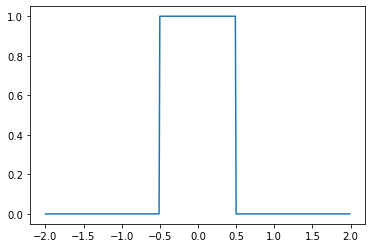

In [2]:
print("Função Ret")
step = np.where(abs(np.arange(-2, 2,0.01))<0.5, 1, 0)
plt.plot(np.arange(-2, 2,0.01),step)
plt.show()


Tendo a função expressa em uma array, se calcula a sua transformada rápida de fourrier(FFT) se utilizando também da biblioteca Numpy.

Fourier Ret


C:\Users\arthu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


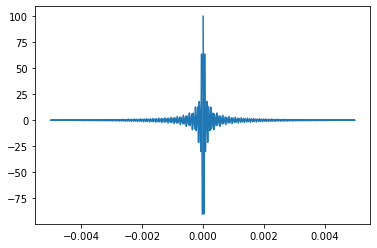

In [3]:
print("Fourier Ret")
fourier = np.fft.fft(step)
xf =  np.fft.fftfreq(len(np.arange(-2, 2,0.01)),1/0.01)
plt.plot(xf,fourier)
plt.show()

#### Função Triângulo

Para a função retângulo um processo parecido é utilizado entretando são geradas 2 funções rampa, que são posteriormente concatenadas formando a função triângulo

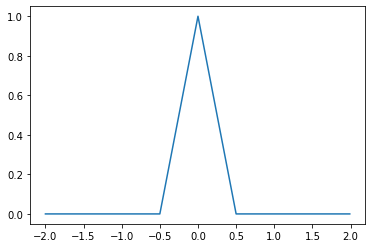

In [5]:
x = np.arange(-2, 0,0.01)
tri1 = np.where(x >-0.5, 2*(x+0.5), 0)
x = np.arange(0, 2,0.01)
tri2 = np.where(x < 0.5, 1-2*x, 0)

tri = np.concatenate([tri1,tri2],axis=0)
plt.plot(np.arange(-2, 2,0.01),tri)
plt.show()


Após a função ser gerada se calcula a sua transformada

C:\Users\arthu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


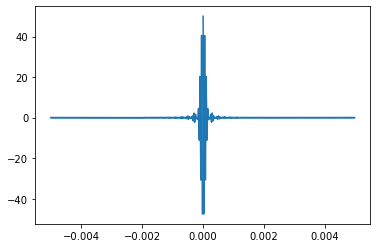

In [6]:
fourier = np.fft.fft(tri)
xf =  np.fft.fftfreq(len(np.arange(-2, 2,0.01)),1/0.01)
plt.plot(xf,fourier)
plt.show()

#### Função Gaussiana

Para gerar a função Gaussiana foi-se utilizado o módulo Functions da bibliotéca Scipy, conforme pode ser visto abaixo.

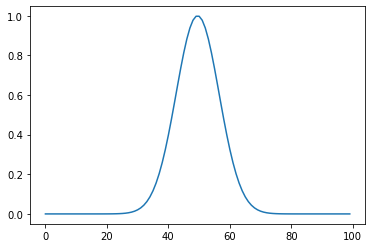

In [8]:
window = gaussian(100, std=7)
plt.plot(range(0,100),window)
plt.show()

A plotagem da transformada seguiu o mesmo procedimento das outras funções.

C:\Users\arthu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


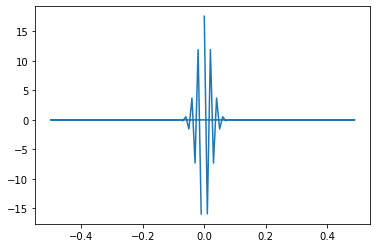

In [9]:
fourier = np.fft.fft(window)
xf =  np.fft.fftfreq(len(range(0,100)),1)
plt.plot(xf,fourier)
plt.show()

#### Função Impulso Discreto

para se gerar o impulso discreto um processo semelhante foi utilizado ao utilizado para gerar a função gaussiana

Delta de Kronecker


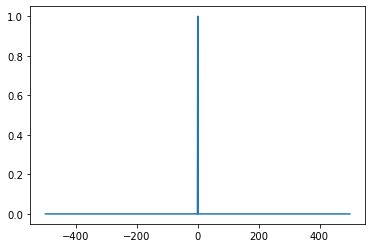

In [10]:
impulso_discreto = unit_impulse(1000,'mid')
print("Delta de Kronecker")
plt.plot(range(-500,500),impulso_discreto)
plt.show()

o processo de calculo da transformada foi identico aos anteriores também

C:\Users\arthu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


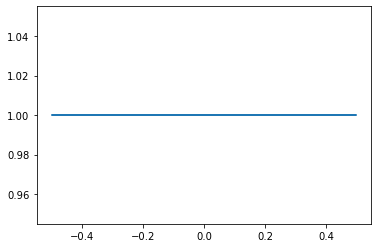

In [11]:
impulso_discreto = unit_impulse(1000)
fourier = np.fft.fft(impulso_discreto)
xf =  np.fft.fftfreq(len(range(-500,500)),1)
plt.plot(xf,fourier)
plt.show()

## 2) Verificar o erro de câmera

### a) Calcular a média, o desvio padrão e a variância, para 20 amostragens (3 bandas e média das 3);

Primeiro se carrega as imagens na memória, e cria-se uma lista para cada banda de cor da imagem, além de uma lista para as imagens em escala de cinza

In [12]:
add = r'C:\Users\arthu\OneDrive\226_2209\q1\IMG_77'

add_list = []
#65
for n in range(37,65):
    add_list.append(add+str(n)+".jpg")

img_list=[]
img_gray = []
for n in range(28):
    img_list.append(cv.imread(add_list[n]))
    img_gray.append(cv.imread(add_list[n],cv.IMREAD_GRAYSCALE))
img_list = np.array(img_list)
img_gray = np.array(img_gray)

im_red = img_list[:,:,:,2]
im_green = img_list[:,:,:,1]
im_blue = img_list[:,:,:,0]

Abaixo um exemplo de uma das imagens adquiridas

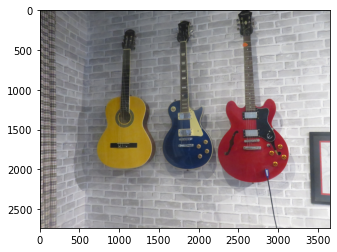

In [17]:
plt.imshow(cv.cvtColor(img_list[0], cv.COLOR_BGR2RGB))
plt.show()

Então se calcula a imagem média, a imagem média em escala de cinza e a média para cada canal

In [13]:
img_mean = np.mean(img_list,axis=0,dtype=float)
img_mean = np.array(img_mean,dtype=np.uint8)

img_mean_1_ch = np.mean(img_gray,axis=0,dtype=float)
img_mean_1_ch = np.array(img_mean_1_ch,dtype=np.uint8)

img_mean_red = np.mean(img_list[:,:,:,0],axis=0,dtype=int)
img_mean_red = np.array(img_mean_red,dtype=np.uint8)

img_mean_green = np.mean(img_list[:,:,:,1],axis=0,dtype=int)
img_mean_green = np.array(img_mean_green,dtype=np.uint8)

img_mean_blue = np.mean(img_list[:,:,:,2],axis=0,dtype=int)
img_mean_blue = np.array(img_mean_blue,dtype=np.uint8)

Se exibe então a imagem média e a imagem média em escala de cinza.

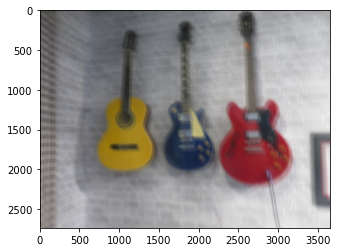

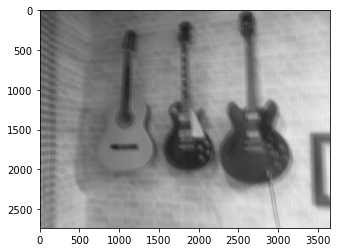

In [20]:
plt.imshow(cv.cvtColor(img_mean, cv.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv.cvtColor(img_mean_1_ch, cv.COLOR_BGR2RGB))
plt.show()

Se calcula o desvio padrão para cada canal e o desvio padrão da imagem em escala de cinza

Desvio Padrão:Escala de cinza


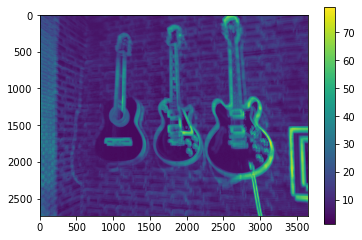

Desvio Padrão:Canal Vermelho


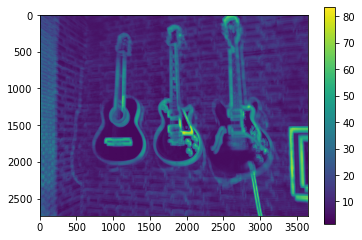

Desvio Padrão:Canal Verde


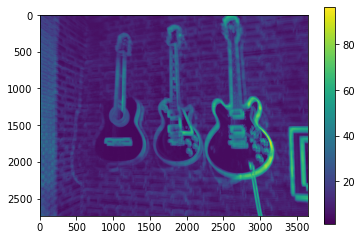

Desvio Padrão:Canal Azul


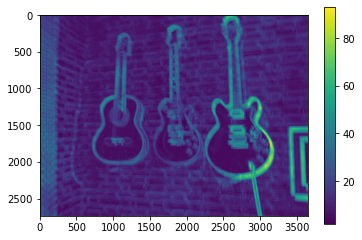

In [26]:
std_dev_1_ch = np.std(img_gray,axis=0)
std_dev_red = np.std(im_red,axis=0)
std_dev_green = np.std(im_green,axis=0)
std_dev_blue = np.std(im_blue,axis=0)
print("Desvio Padrão:Escala de cinza")
plt.imshow(std_dev_1_ch)
plt.colorbar()
plt.show()
print("Desvio Padrão:Canal Vermelho")
plt.imshow(std_dev_red)
plt.colorbar()
plt.show()
print("Desvio Padrão:Canal Verde")
plt.imshow(std_dev_green)
plt.colorbar()
plt.show()
print("Desvio Padrão:Canal Azul")
plt.imshow(std_dev_blue)
plt.colorbar()
plt.show()

O mesmo processo é então realizado para a variância

Variância:Escala de cinza


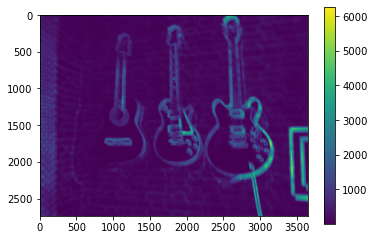

Variância:Canal Vermelho


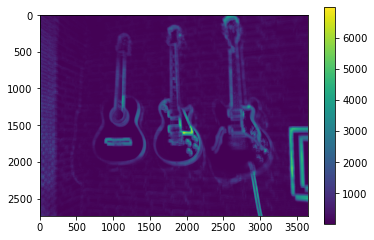

Variância:Canal Verde


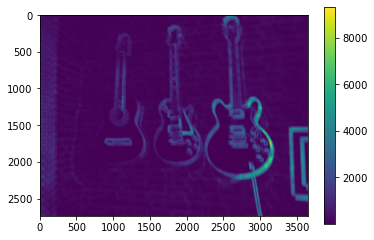

Variância:Canal Azul


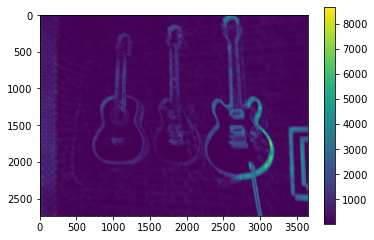

In [27]:
var_red = np.var(im_red,axis=0)
var_green = np.var(im_green,axis=0)
var_blue = np.var(im_blue,axis=0)
var_1_ch = np.var(img_gray,axis=0)

print("Variância:Escala de cinza")
plt.imshow(var_1_ch)
plt.colorbar()
plt.show()
print("Variância:Canal Vermelho")
plt.imshow(var_red)
plt.colorbar()
plt.show()
print("Variância:Canal Verde")
plt.imshow(var_green)
plt.colorbar()
plt.show()
print("Variância:Canal Azul")
plt.imshow(var_blue)
plt.colorbar()
plt.show()

### b) Escolher uma determinada linha da imagem e plotar um gráfico mostrando, para cada pixel, 
duas curvas: média mais desvio padrão; média menos desvio padrão (3 bandas e média das 3).

Se calcula a média de cada linha em escala de cinza e nos 3 canais, assim como a média mais desvio padrão e a média menos desvio padrão

In [29]:
line_mean_red = img_mean_red[int(len(img_mean)/2),:]
line_std_dev_red = std_dev_red[int(len(img_mean)/2),:]
line_mean_plus_red = line_mean_red + line_std_dev_red
line_mean_minus_red = line_mean_red - line_std_dev_red

line_mean_green = img_mean_green[int(len(img_mean)/2),:]
line_std_dev_green = std_dev_green[int(len(img_mean)/2),:]
line_mean_plus_green = line_mean_green + line_std_dev_green
line_mean_minus_green = line_mean_green - line_std_dev_green

line_mean_blue = img_mean_blue[int(len(img_mean)/2),:]
line_std_dev_blue = std_dev_blue[int(len(img_mean)/2),:]
line_mean_plus_blue = line_mean_blue + line_std_dev_blue
line_mean_minus_blue = line_mean_blue - line_std_dev_blue

line_mean_gr = img_mean_1_ch[int(len(img_mean)/2),:]
line_std_dev_gr = std_dev_1_ch[int(len(img_mean)/2),:]
line_mean_plus_gr = line_mean_gr + line_std_dev_gr
line_mean_minus_gr = line_mean_gr - line_std_dev_gr

Então se plota os gráficos para cada banda 

Line Red


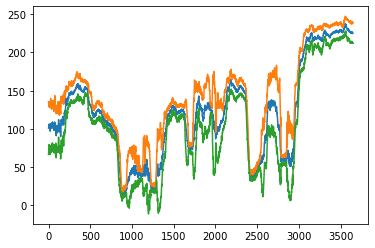

Line Green


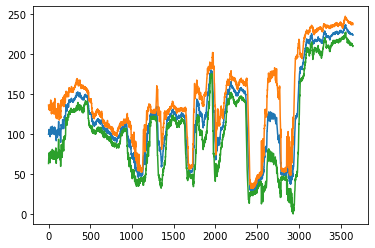

Line Blue


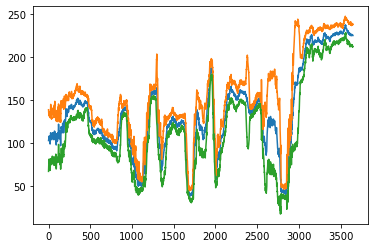

Line Grey


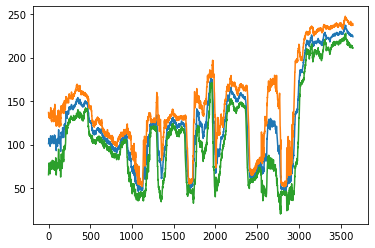

In [30]:
#Plot Média + std_dev dos 3 pixels da linha
print("Line Red")
plt.plot(line_mean_red)
plt.plot(line_mean_plus_red)
plt.plot(line_mean_minus_red)
plt.show()

print("Line Green")
plt.plot(line_mean_green)
plt.plot(line_mean_plus_green)
plt.plot(line_mean_minus_green)
plt.show()

print("Line Blue")
plt.plot(line_mean_blue)
plt.plot(line_mean_plus_blue)
plt.plot(line_mean_minus_blue)
plt.show()

print("Line Grey")
plt.plot(line_mean_gr)
plt.plot(line_mean_plus_gr)
plt.plot(line_mean_minus_gr)
plt.show()


### c) Indique outros dados da imagem (nível de cinza mínimopara cada cor, nível máximo para cada cor, 
mostre 5 imagens das 20 adquiridas, taxa de amostragem máxima, etc).

Se separa as 5 imagens 

In [31]:
im_red_5 = im_red[0:5]
im_blue_5 = im_blue[0:5]
im_green_5 = im_green[0:5]

Se obtem o máximo e mínimo de cada cor para cada imagem

In [32]:
print("Max Red 1:",np.max(im_red_5[0]))
print("Max Red 2:",np.max(im_red_5[1]))
print("Max Red 3:",np.max(im_red_5[2]))
print("Max Red 4:",np.max(im_red_5[3]))
print("Max Red 5:",np.max(im_red_5[4]))
print()
print("Min Red 1:",np.min(im_red_5[0]))
print("Min Red 2:",np.min(im_red_5[1]))
print("Min Red 3:",np.min(im_red_5[2]))
print("Min Red 4:",np.min(im_red_5[3]))
print("Min Red 5:",np.min(im_red_5[4]))
print()
print("Max Blue 1:",np.max(im_blue_5[0]))
print("Max Blue 2:",np.max(im_blue_5[1]))
print("Max Blue 3:",np.max(im_blue_5[2]))
print("Max Blue 4:",np.max(im_blue_5[3]))
print("Max Blue 5:",np.max(im_blue_5[4]))
print()
print("Min Blue 1:",np.min(im_blue_5[0]))
print("Min Blue 2:",np.min(im_blue_5[1]))
print("Min Blue 3:",np.min(im_blue_5[2]))
print("Min Blue 4:",np.min(im_blue_5[3]))
print("Min Blue 5:",np.min(im_blue_5[4]))
print()
print("Max Green 1:",np.max(im_green_5[0]))
print("Max Green 2:",np.max(im_green_5[1]))
print("Max Green 3:",np.max(im_green_5[2]))
print("Max Green 4:",np.max(im_green_5[3]))
print("Max Green 5:",np.max(im_green_5[4]))
print()
print("Min Green 1:",np.min(im_green_5[0]))
print("Min Green 2:",np.min(im_green_5[1]))
print("Min Green 3:",np.min(im_green_5[2]))
print("Min Green 4:",np.min(im_green_5[3]))
print("Min Green 5:",np.min(im_green_5[4]))

Max Red 1: 255
Max Red 2: 255
Max Red 3: 255
Max Red 4: 255
Max Red 5: 255

Min Red 1: 6
Min Red 2: 2
Min Red 3: 0
Min Red 4: 8
Min Red 5: 2

Max Blue 1: 255
Max Blue 2: 255
Max Blue 3: 255
Max Blue 4: 255
Max Blue 5: 255

Min Blue 1: 0
Min Blue 2: 0
Min Blue 3: 0
Min Blue 4: 0
Min Blue 5: 0

Max Green 1: 255
Max Green 2: 255
Max Green 3: 255
Max Green 4: 255
Max Green 5: 255

Min Green 1: 3
Min Green 2: 4
Min Green 3: 2
Min Green 4: 2
Min Green 5: 0


Por fim se plota os histogramas de cada imagem em cada cor

Histograma img  1


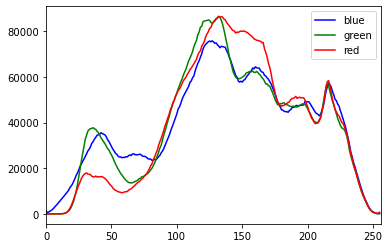

Histograma img  2


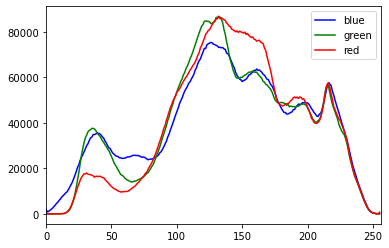

Histograma img  3


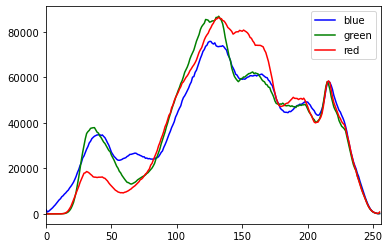

Histograma img  4


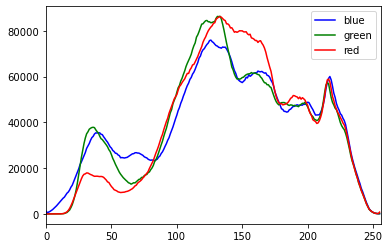

Histograma img  5


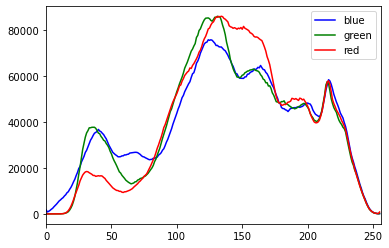

In [33]:
for n in range(1,6):
    print("Histograma img ",n)
    image = img_list[n-1]
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color = col)
        plt.legend(['blue', 'green', 'red'])
        plt.xlim([0, 256])

    plt.show()

# 3) Auto-covariância:

### a) Calcular a covariância para 25 imagens amostradas pelas câmeras, numa área de 32x32 pixels, posicionada no centro das imagens;

primeiro se carrega as imagens na memória do computador

In [4]:
add = r'C:\Users\arthu\OneDrive\226_2209\q1\IMG_77'

add_list = []
#65
for n in range(37,62):
    add_list.append(add+str(n)+".jpg")

img_list=[]
img_gray = []
for n in range(25):
    img_list.append(cv.imread(add_list[n]))
    img_gray.append(cv.imread(add_list[n],cv.IMREAD_GRAYSCALE))
img_list = np.array(img_list)
img_gray = np.array(img_gray)

é calculada então a imagem média em escala de cinza das imagens estudadas

In [5]:
img_gray_mean = np.mean(img_gray,axis=0)

A função abaixo foi definida para calcular a covariância de uma imagem em uma área ixj de pixels

In [6]:
def cov(img,img_mean,length,i,j):
    cov = 0
    c=1/(length**2)

    ni=length-i-1
    nj=length-j-1

    
    for x in range(0,ni):
        for y in range(0,nj):
            cov = cov+(img[x,y]-img_mean[x,y])*(img[x+i,y+j]-img_mean[x+i,y+j])

    cov = c*cov
    return cov

por fim se calcula a covarância na área desejada

In [7]:
g=32
img_cov = np.zeros((25,g,g))
for n in range(25):
    for x in range(int(g)):
        for y in range(int(g)):
            img=img_gray[n,1368-g:1368+g,1848-g:1848+g]
            img_cov[n,x,y] = cov(img,img_gray_mean,g,x,y)

Como exemplo se plotou a Covariância Média de uma das imagens

Gráfico da Covariância Média


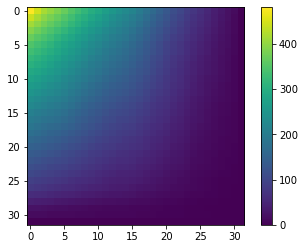

In [10]:
print("Gráfico da Covariância Média")
plt.imshow(img_cov[0])
plt.colorbar()
plt.show()

### b) Plotar o gráfico da média da covariância  (bidimensional)

Se utilizando da biblioteca matplotlib se plota a coaviância média que foi calculada se utilizando da biblioteca numpy

Gráfico da Covariância Média


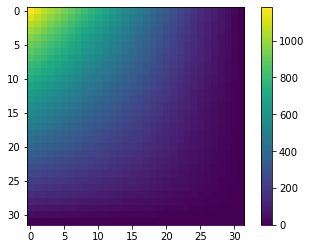

In [11]:
print("Gráfico da Covariância Média")
plt.imshow(np.mean(img_cov,axis=0))
plt.colorbar()
plt.show()

# 4) Implementar um algoritmo de retirada da distorção radiométrica e testar com a sua câmera.

Esta parte do trabalho não foi implementada

# 5)Algoritmo de calibração de câmera

Nesta questão foram implementados os 2 métodos de calibração presentes no livro "Introductory Technics for 3-D Computer Vision" escrito por Trucco e Verri, para facilitar eles seram nomeados como "método de Trucco 1"e "método de Trucco 2", o método de Tsai não foi implementado

Primeiro se carrega na memória a imagem utilizada para se calibrar a câmera

In [198]:
add = r'C:\Users\arthu\OneDrive\226_2209\IMG_8010.JPG'
img = cv.imread(add)

resized = cv.resize(img, (int(3648/4),int(2736/4)), interpolation = cv.INTER_AREA)

gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
# Find the chess board corners

Se utlizando da biblioteca OpenCV pontos fixos na imagem são calculados

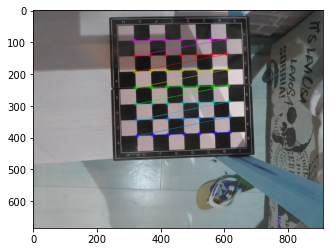

In [199]:
ret, corners = cv.findChessboardCorners(gray, (7,7), None)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

imgpoints = [] # 2d points in image plane.

corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
imgpoints.append(corners)
# Draw and display the corners
cv.drawChessboardCorners(resized, (7,7), corners2, ret)
plt.imshow(resized)
plt.show()

corners = np.flip(corners)

Previamente um dos pontos teve a sua posição em coordenadas de mundo medida e a partir deste valor, e sabendo-se previamente as dimenções do tabuleiro de Xadrez utilizado na foto, as coordenadas de mundo dos outros pontos puderam ser calculadas com o código abaixo

In [200]:
#Carregar pontos do tabuleiro em coordenadas de mundo, foi medido 1 ponto no tabuleiro
#os outros foram deduzidos se utilizando de geometria
point_list = []
p00 = np.array([11.4,39.9,49.7])
#point_list.append(p00)
cont = 0
for n in range(0,7):
    for m in range(0,7):
        cont=cont+1
        point = np.array([p00[0]+m*2.6,p00[1]+n*2.6,p00[2]])
        point_list.append(point)


### Método de Trucco 1

Seguindo as instruções contidas no livro a matriz A é montada

In [201]:
N = len(point_list)
A = np.zeros((N,8))

for n in range(N):
    A[n,0] = corners[n,0,1] * point_list[n][0]
    A[n,1] = corners[n,0,1] * point_list[n][1]
    A[n,2] = corners[n,0,1] * point_list[n][2]
    A[n,3] = corners[n,0,1] 
    A[n,4] = -corners[n,0,0] * point_list[n][0]
    A[n,5] = -corners[n,0,0] * point_list[n][1]
    A[n,6] = -corners[n,0,0] * point_list[n][2]
    A[n,7] = -corners[n,0,0] 
    

Com a matriz pronta se realiza a sua decomposição SVD

In [202]:
u, s, vh = np.linalg.svd(A, full_matrices=True)
v = vh.T

A partir da decomposição se calculam os parâmetros de cámera se utilizando as instruções do livro

In [203]:
index_min = np.argmin(s)

res = v[:,7]

gamma = np.sqrt((res[0]**2 + res[1]**2 + res[2]**2))
alfa = np.sqrt(res[4]**2 + res[5]**2 + res[6]**2)/gamma
#foi verificado que não é necessário inverter as linhas r1 e r2
r11 = res[4]/(alfa*gamma)
r12 = res[5]/(alfa*gamma)
r13 = res[6]/(alfa*gamma)
r21 = res[0]/(gamma)
r22 = res[1]/(gamma)
r23 = res[2]/(gamma)
tx = res[7]/(alfa*gamma)
ty = res[3]/(gamma)

r31,r32,r33 = np.cross([r11,r12,r13],[r21,r22,r23])

a = []
for n in range(N):
    val = [-corners[n,0,0],(r11*point_list[n][0] + r12*point_list[n][1] + r13*point_list[n][2])]
    a.append(val)
a = np.array(a)
b = []
for n in range(N):
    val = -corners[n,0,0]*(r31*point_list[n][0] + r32*point_list[n][1] + r33*point_list[n][2])
    b.append(val)
ret = np.linalg.inv(np.matmul(a.T,a))
ret = np.matmul(ret,a.T)
ret = np.matmul(ret,b)

tz = ret[0]
fx = ret[1]


r_aprox = np.array([[r11,r12,r13],
                   [r21,r22,r23],
                   [r31,r32,r33]])
u, s, vh = np.linalg.svd(r_aprox, full_matrices=True)
R = np.matmul(u,np.identity(3))
R = np.matmul(R,vh)

Por fim se exibe os resultados obtidos

In [204]:
print("R")
print(R)
print("T")
print("[",tx,ty,tz,"]")
print("Fx:",fx)
print("alfa:",alfa)

R
[[-6.01075125e-01  3.72436161e-01  7.07106781e-01]
 [ 6.01075125e-01 -3.72436161e-01  7.07106781e-01]
 [ 5.26704270e-01  8.50048594e-01  2.26335822e-15]]
T
[ -49.70000000000011 -49.700000000000045 1.3930223380945383e-12 ]
Fx: 9.62599901224819e-13
alfa: 2.8754345392872076


### Método de Trucco 2

Se monta a Matriz A seguindo instruções contidas no livro base

In [205]:
N = len(point_list)
A = np.zeros((N*2,12))

for n in range(0,N,2):
    #codigo
    A[n,0] = point_list[n][0]
    A[n,1] = point_list[n][1]
    A[n,2] = point_list[n][2]
    A[n,3] = 1
    A[n,4] = 0
    A[n,5] = 0
    A[n,6] = 0
    A[n,7] = 0
    A[n,8] = -point_list[n][0]*corners[n,0,1]
    A[n,9] = -point_list[n][1]*corners[n,0,1]
    A[n,10] = -point_list[n][2]*corners[n,0,1]
    A[n,11] = -corners[n,0,1]
    
    A[n+1,0] = 0
    A[n+1,1] = 0
    A[n+1,2] = 0
    A[n+1,3] = 0
    A[n+1,4] = point_list[n][0]
    A[n+1,5] = point_list[n][1]
    A[n+1,6] = point_list[n][2]
    A[n+1,7] = 1
    A[n+1,8] = -point_list[n][0]*corners[n,0,0]
    A[n+1,9] = -point_list[n][1]*corners[n,0,0]
    A[n+1,10] = -point_list[n][2]*corners[n,0,0]
    A[n+1,11] = -corners[n,0,0]

Com a matriz pronta se realiza a sua decomposição SVD

In [206]:
u, s, vh = np.linalg.svd(A, full_matrices=True)
v = vh.T

index_min = np.argmin(s)

res = v[:,index_min]


A partir da decomposição do SVD e se utlizando de algumas propriedades se obtem os parâmetros intrinsecos e extrinsecos da câmera

In [207]:
q1 = res[0:3]
q2 = res[4:7]
q3 = res[8:11]
q4 = np.array([res[3],res[7],res[11]])

gamma = np.sqrt(q3[0]**2 + q3[1]**2 + q3[2]**2)

M_normalized = res/gamma
m1 = M_normalized[0:3]
m2 = M_normalized[4:7]
m3 = M_normalized[8:11]
m4 = np.array([M_normalized[3],M_normalized[7],M_normalized[11]])



ox = np.dot(q1.T,q3)
oy = np.dot(q2.T,q3)
fx = np.sqrt(np.dot(q1.T,q1)-ox**2)
fy = np.sqrt(np.dot(q2.T,q2)-oy**2)
tz = M_normalized[11]

r3 = M_normalized[8:11]
r1 = (ox*m3-m1)/fx
r2 = (oy*m3-m2)/fy

tx = (ox*tz-M_normalized[3])/fx
ty = (oy*tz-M_normalized[7])/fy

r_aprox = np.array([[r1,r2,r3]])

u, s, vh = np.linalg.svd(r_aprox, full_matrices=True)
R = np.matmul(u,np.identity(3))
R = np.matmul(R,vh)

Sendo estes exibidos abaixo

In [208]:
print("R")
print(R)
print("T")
print("[",tx,ty,tz,"]")
print("Fx:",fx)
print("Fy:",fy)
print("ox:",ox)
print("oy:",oy)

R
[[[ 7.03934949e-01  6.68998876e-02 -7.07106776e-01]
  [-7.03951425e-01 -6.67263004e-02 -7.07106776e-01]
  [-9.44879829e-02  9.95525995e-01  1.23296337e-04]]]
T
[ 285030.4198333326 285030.4198335814 -49.699999999999385 ]
Fx: 0.0005558492042426482
Fy: 0.02010821552562014
ox: 9.692195474078273e-08
oy: 3.5062163266879175e-06


# 6) Implementar método de Shape from Shading e Shape from Motion

### Shape From Shading

O algoritmo implementado foi baseado no relatório técnico "Hands on Shape from Shading" escrito por Shreen Y. Elhabian do laboratório de Visão Computacional e Processamento de imagens da Universidade de Louisville

Primeiro deve-se carregar a imagem utilizada no estudo

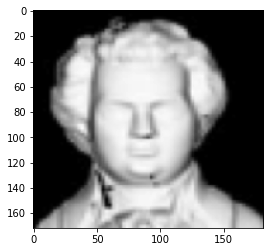

In [12]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
add = r'C:\Users\arthu\OneDrive\226_2209\EEE.png'
img = cv.imread(add)
x,y,z = img.shape
reduc = 1

resized = cv.resize(img, (int(x/reduc),int(y/reduc)), interpolation = cv.INTER_AREA)

img = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)

plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.show()

Após o carregamento da iamgem deve-se calcular o albedo e a direção da iluminação da imagem estudada. Para isto foi utilizado um algoritmo que considera as imagens como superficies Lambertianas.

In [2]:
def albedo_ilum(img):
    img = img/np.max(img)
    mu1 = img.mean()
    mu2 = np.mean(img**2)
    Ex,Ey = np.gradient(img)
    Exy = np.sqrt(Ex**2+Ey**2)
    nEx = Ex/(Exy+np.finfo(float).eps)
    nEy = Ey/(Exy+np.finfo(float).eps)
    meanEx = np.mean(nEx)
    meanEy = np.mean(nEy)
    
    gamma = np.sqrt((6*(np.pi**2)*mu2)-(48*mu1**2))
    albedo = gamma/np.pi
    
    slant = np.arccos(4*mu1/gamma)
    tilt = np.arctan(meanEy/meanEx)
    
    if tilt<0:
        tilt = tilt+np.pi
    
    I = np.array([np.cos(tilt)*np.sin(slant),
                 np.sin(tilt)*np.sin(slant),
                 np.cos(slant)])
    return albedo, slant, tilt, I
albedo, slant, tilt, I = albedo_ilum(img)

Com estes valores calculados deve-se então iterar sobre as seguintes estapas
- Computar a derivada de segunda ordem do campo de normais da superficie
- Utilizando-se o Albedo da superficie, a direção da iluminação e o compo de normais da superficie se estima o mapa de reflectancia
- Garante=se que o mapa de reflectância é positivo substituindo-se todos os valores menores que 0 por 0
- Calcula-se a função f que é a diferença entre o mapa de reflectância calculado com a imagem original
- Se calcula então a derivada de f em relação a Superficie calculada Z
- Se atualiza então a Superficie Z 
- Por fim se calculam as derivadas da superficie Z em relação a X e Y

In [3]:
shape = img.shape
m,n = img.shape
p = np.zeros(shape)
q = np.zeros(shape)

Z = np.zeros(shape)

Z_x = np.zeros(shape)
Z_y = np.zeros(shape)

maxIter = 10000

ix = np.cos(tilt) * np.tan(slant)
iy = np.sin(tilt) * np.tan(slant)

for k in range(maxIter):
    R = (np.cos(slant) + p*np.cos(tilt)*np.sin(slant)+q*np.sin(tilt)*np.sin(slant))/np.sqrt(1+p**2+q**2)
    R[R<0] = 0
    f = img-R
    
    df_dz = ((p+q)*(ix*p+iy*q+1)/(np.sqrt((1+p**2+q**2)**3)*np.sqrt(1+ix**2+iy**2))) - \
                                (ix+iy)/(np.sqrt(1+p**2+q**2)*np.sqrt(1+ix**2+iy**2))
    Z = Z-f/(df_dz+np.finfo(float).eps)
    
    Z_x[2:m,:] = Z[1:m-1,:]
    Z_y[:,2:n] = Z[:,1:n-1]
    p = Z-Z_x
    q = Z-Z_y

Após o processo se exibe o resultado obtido

In [4]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt 
X = np.arange(0, n)
Y = np.arange(0, m)
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, -Z)
plt.ion()
plt.show()

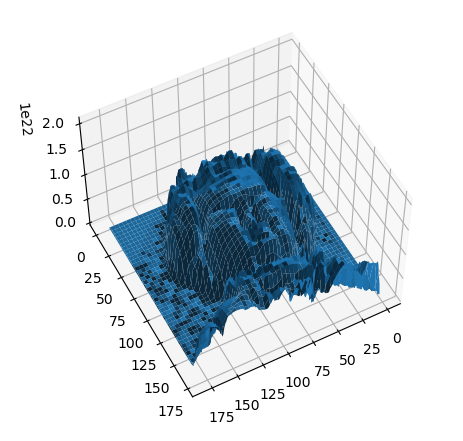

### Shape From Motion

Este algoritmo de Shape from Motion foi implementado se baseando nas aulas ministradas e no artigo "Determining Optical Flow" de Berthold K. P. Horn e Brian G. Schinck do Laboratório de Inteligência Artificial do Instituto de Tecnologia de Massachussett

A principio se carrega a imagem na memória

In [18]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
add = r'C:\Users\arthu\OneDrive\226_2209\EEE.png'
img = cv.imread(add)
x,y,z = img.shape
reduc = 1

resized = cv.resize(img, (int(x/reduc),int(y/reduc)), interpolation = cv.INTER_AREA)

img = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)

Com as imagens carregadas se define as matrizes u e v que irão compor o campo de movimento da imagem e se define as metrizes utilizadas ao se calcular a derivada das imagens em X e Y

In [19]:
img_list_len = 1000

u = np.zeros((img.shape[0],img.shape[1],img_list_len))
v = np.zeros((img.shape[0],img.shape[1],img_list_len))

lamb = 0 
kx = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])
ky = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Se itera sobre a lista de imagens, a cada interação é calculada a derivada da imagem em X em Y e em relação ao tempo T e a partir delas se é obtido o campo de movimentos u e v

In [ ]:
for t in range(1,img_list_len):
    E = img_list[t]
    E_ = img_list[t-1]
    fx =  cv.filter2D(src=E, ddepth=-1, kernel=kx)
    fy =  cv.filter2D(src=E, ddepth=-1, kernel=ky)
    ft = E - E_
    P = fx*u[t-1] - fy*v[t-1] + ft
    D = lamb**2 + fx**2 + fy**2
    
    u[t] = u[t-1] - fx*P/D
    v[t] = v[t-1] - fy*P/D